In [1]:
import pandas as pd

# Importando os datasets

In [2]:
lobby_stats = pd.read_csv("tb_lobby_stats_player.csv")
medalhas = pd.read_csv("tb_medalha.csv")
medalhas_players = pd.read_csv("tb_players_medalha.csv")
players = pd.read_csv("tb_players.csv")

## Juntado os datasets

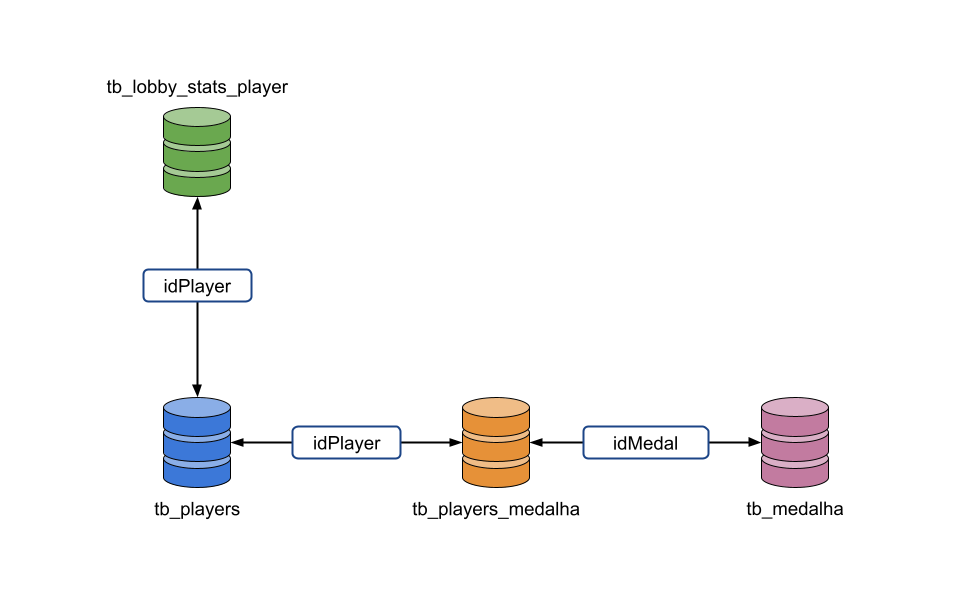

In [3]:
lobby_stats = pd.merge(lobby_stats, players, on="idPlayer")
player_stats = pd.merge(players, medalhas_players, on="idPlayer")

Como um jogador pode ter multiplas medalhas, podemos fazer o one hot encoding ou transformar em uma string com as medalhas para futuras análises, sendo a ultima opção a escolhida

In [4]:
player_medals = pd.DataFrame()
for player in player_stats.groupby("idPlayer"):
    tmp_dict = pd.DataFrame({"idPlayer":player[0],
                             "medals":str(player[1]["idMedal"].unique())}, index=[player[0]])
    player_medals = pd.concat([player_medals, tmp_dict])

In [5]:
lobby_stats = pd.merge(lobby_stats, player_medals, on="idPlayer")

In [7]:
lobby_stats.to_csv("tb_stats.csv")